In [1]:
# === Set NLTK Path for Offline Resources ===
import os
import nltk
nltk_path = '/Users/hanpham/nltk_data'
nltk.data.path.append(nltk_path)

# === Download Required NLTK Resources ===
nltk.download('punkt', download_dir=nltk_path)
nltk.download('averaged_perceptron_tagger', download_dir=nltk_path)
nltk.download('stopwords', download_dir=nltk_path)

# === Core Python Libraries ===
import re
import string
from collections import Counter

# === Data Handling ===
import pandas as pd
import numpy as np

# === NLP ===
from nltk import word_tokenize, pos_tag
from nltk.util import bigrams, ngrams
from nltk.corpus import stopwords

# === Visualization ===
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import networkx as nx

# === Text Analysis ===
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /Users/hanpham/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hanpham/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hanpham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('review_scrape_50.csv', header=0)

In [3]:
df.columns

Index(['title', 'Date', 'UserID ', 'All Review ', 'Reviews', 'Location Rating',
       'Rooms Rating', 'Service Rating', 'stars', 'Owner Response Date',
       'Owner Response'],
      dtype='object')

In [4]:
df = df.drop('All Review ', axis=1)

In [5]:
df

,title,Date,UserID,Reviews,Location Rating,Rooms Rating,Service Rating,stars,Owner Response Date,Owner Response
0,New York Marriott Downtown,6/6/25 12:13,70209,NaN,NaN,NaN,NaN,4,NaN,NaN
1,New York Marriott Downtown,5/30/25 23:12,45412,NaN,5.0,4.0,5.0,5,NaN,NaN
2,New York Marriott Downtown,5/25/25 21:11,16441,perfect location for exploring downtown manhat...,5.0,3.0,3.0,3,NaN,NaN
3,New York Marriott Downtown,5/23/25 9:01,68783,super comfy beds and kept wonderfully clean. w...,5.0,5.0,5.0,5,NaN,NaN
4,New York Marriott Downtown,5/22/25 5:30,36830,wonderful service and great room service!!!,5.0,5.0,5.0,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
695,New York Marriott Marquis,5/23/25 11:51,16576,the service is terrible! workers are talking a...,5.0,4.0,1.0,3,NaN,NaN
696,New York Marriott Marquis,5/23/25 10:19,43120,a lot of great service and people,5.0,5.0,5.0,5,NaN,NaN
697,New York Marriott Marquis,5/22/25 16:43,38436,what can i say... fabulous!!! we had an unforg...,5.0,5.0,5.0,5,NaN,NaN
698,New York Marriott Marquis,5/22/25 8:11,19142,NaN,5.0,5.0,4.0,5,NaN,NaN


In [6]:
def get_brand(title):
    title_lower = str(title).lower()
    if 'w new york' in title_lower:
        return 'Marriott'
    elif 'marriott' in title_lower:
        return 'Marriott'
    elif 'intercontinental' in title_lower:
        return 'IHG'
    elif 'hilton' in title_lower:
        return 'Hilton'
    elif 'hyatt' in title_lower:
        return 'Hyatt'
    elif 'sofitel' in title_lower:
        return 'Accor'
    elif 'indigo' in title_lower:
        return 'IHG'
    elif 'sheraton' in title_lower:
        return 'Marriott'
    elif 'warwick' in title_lower:
        return 'Warwick'
    else:
        return ''

df['Brand'] = df['title'].apply(get_brand)

In [7]:
df = df.dropna(subset=["Reviews"])

In [8]:
df

,title,Date,UserID,Reviews,Location Rating,Rooms Rating,Service Rating,stars,Owner Response Date,Owner Response,Brand
2,New York Marriott Downtown,5/25/25 21:11,16441,perfect location for exploring downtown manhat...,5.0,3.0,3.0,3,NaN,NaN,Marriott
3,New York Marriott Downtown,5/23/25 9:01,68783,super comfy beds and kept wonderfully clean. w...,5.0,5.0,5.0,5,NaN,NaN,Marriott
4,New York Marriott Downtown,5/22/25 5:30,36830,wonderful service and great room service!!!,5.0,5.0,5.0,5,NaN,NaN,Marriott
5,New York Marriott Downtown,5/20/25 19:39,31236,they have a hidden destination fee which i did...,5.0,4.0,4.0,5,NaN,NaN,Marriott
9,New York Marriott Downtown,5/9/25 8:48,52253,hotel was dirty - my son got bites or a rash o...,NaN,NaN,NaN,1,NaN,NaN,Marriott
...,...,...,...,...,...,...,...,...,...,...,...
694,New York Marriott Marquis,5/23/25 15:29,12244,great view of times square. great breakfast!,5.0,5.0,5.0,5,NaN,NaN,Marriott
695,New York Marriott Marquis,5/23/25 11:51,16576,the service is terrible! workers are talking a...,5.0,4.0,1.0,3,NaN,NaN,Marriott
696,New York Marriott Marquis,5/23/25 10:19,43120,a lot of great service and people,5.0,5.0,5.0,5,NaN,NaN,Marriott
697,New York Marriott Marquis,5/22/25 16:43,38436,what can i say... fabulous!!! we had an unforg...,5.0,5.0,5.0,5,NaN,NaN,Marriott


In [9]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

In [10]:
sentiment_df = df["Reviews"].apply(get_sentiment_scores).apply(pd.Series)

In [11]:
sentiment_df

,neg,neu,pos,compound
2,0.049,0.855,0.096,0.4215
3,0.000,0.474,0.526,0.9231
4,0.000,0.316,0.684,0.8650
5,0.088,0.912,0.000,-0.3404
9,0.212,0.788,0.000,-0.8658
...,...,...,...,...
694,0.000,0.371,0.629,0.8588
695,0.188,0.679,0.133,-0.3094
696,0.000,0.594,0.406,0.6249
697,0.000,0.586,0.414,0.7946


In [12]:
df = pd.concat([df, sentiment_df], axis=1)
df = df.rename(columns={
    'neg': 'Negative',
    'neu': 'Neutral',
    'pos': 'Positive',
    'compound': 'Compound'
})

In [13]:
df

,title,Date,UserID,Reviews,Location Rating,Rooms Rating,Service Rating,stars,Owner Response Date,Owner Response,Brand,Negative,Neutral,Positive,Compound
2,New York Marriott Downtown,5/25/25 21:11,16441,perfect location for exploring downtown manhat...,5.0,3.0,3.0,3,NaN,NaN,Marriott,0.049,0.855,0.096,0.4215
3,New York Marriott Downtown,5/23/25 9:01,68783,super comfy beds and kept wonderfully clean. w...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.474,0.526,0.9231
4,New York Marriott Downtown,5/22/25 5:30,36830,wonderful service and great room service!!!,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.316,0.684,0.8650
5,New York Marriott Downtown,5/20/25 19:39,31236,they have a hidden destination fee which i did...,5.0,4.0,4.0,5,NaN,NaN,Marriott,0.088,0.912,0.000,-0.3404
9,New York Marriott Downtown,5/9/25 8:48,52253,hotel was dirty - my son got bites or a rash o...,NaN,NaN,NaN,1,NaN,NaN,Marriott,0.212,0.788,0.000,-0.8658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,New York Marriott Marquis,5/23/25 15:29,12244,great view of times square. great breakfast!,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.371,0.629,0.8588
695,New York Marriott Marquis,5/23/25 11:51,16576,the service is terrible! workers are talking a...,5.0,4.0,1.0,3,NaN,NaN,Marriott,0.188,0.679,0.133,-0.3094
696,New York Marriott Marquis,5/23/25 10:19,43120,a lot of great service and people,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.594,0.406,0.6249
697,New York Marriott Marquis,5/22/25 16:43,38436,what can i say... fabulous!!! we had an unforg...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.586,0.414,0.7946


In [14]:
df.to_csv('hotel_reviews_with_sentiment.csv', index=False)

In [15]:
avg_sentiment_by_hotel = df.groupby("title")["Compound"].mean().reset_index()
avg_sentiment_by_hotel = avg_sentiment_by_hotel.sort_values(by="Compound", ascending=False)

In [16]:
avg_sentiment_by_hotel

,title,Compound
6,"InterContinental New York Times Square, an IHG...",0.762249
5,InterContinental New York Barclay by IHG,0.610273
7,"Marriott Vacation Club, New York City",0.607443
12,W New York - Times Square,0.548073
13,Warwick New York,0.539661
2,Hotel Indigo Lower East Side New York by IHG,0.497142
0,"Dream Downtown, by Hyatt",0.445130
8,New York Marriott Downtown,0.429655
11,Sofitel New York,0.421361
3,Hyatt Grand Central New York,0.378962


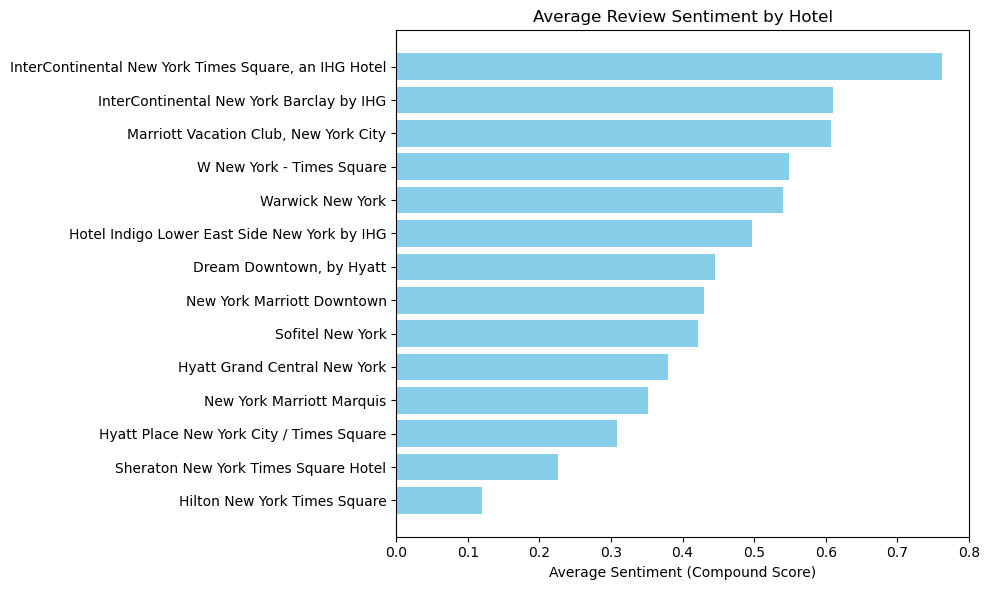

In [17]:
plt.figure(figsize=(10, 6))
plt.barh(avg_sentiment_by_hotel["title"], avg_sentiment_by_hotel["Compound"], color="skyblue")
plt.xlabel("Average Sentiment (Compound Score)")
plt.title("Average Review Sentiment by Hotel")
plt.gca().invert_yaxis()  # Most positive at the top
plt.tight_layout()
plt.savefig('figures/Average Review Sentiment by Hotel.png', dpi=300)
plt.show()

This highlights standout properties and helps identify which hotels are excelling in service delivery based on guest feedback.

The top three hotels with the highest average sentiment scores are all premium IHG and one Marriott property, with InterContinental New York Times Square (IHG) significantly outperforming all others. This suggests that specific IHG hotels deliver a consistently superior guest experience at the individual property level

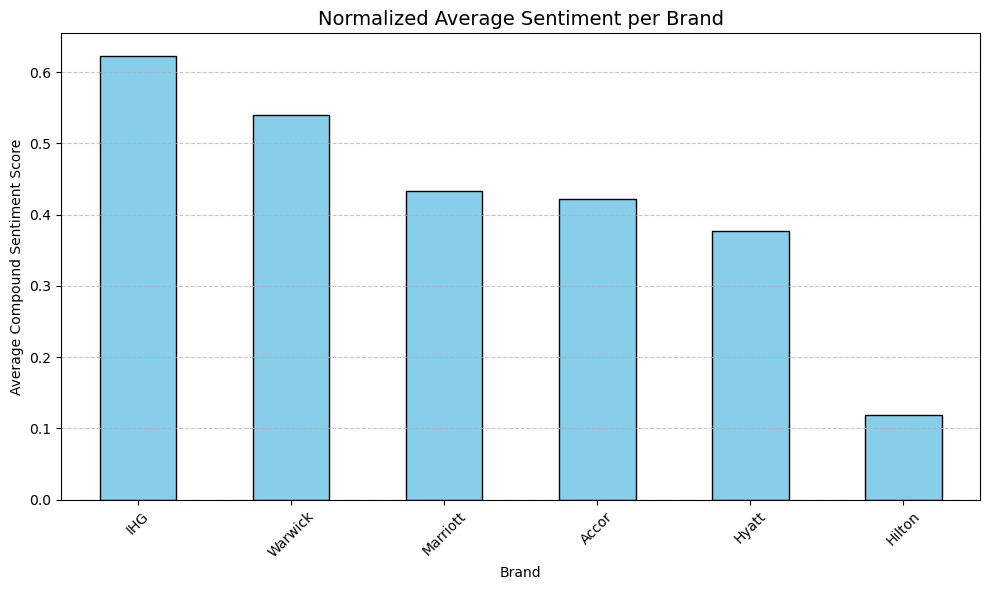

In [18]:
# Normalize sentiment score per brand by averaging across properties
property_avg = df.groupby(['Brand', 'title'])['Compound'].mean().reset_index()
brand_normalized_avg = property_avg.groupby('Brand')['Compound'].mean().sort_values(ascending=False)

# Plot normalized sentiment
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
brand_normalized_avg.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Normalized Average Sentiment per Brand', fontsize=14)
plt.ylabel('Average Compound Sentiment Score')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('figures/Normalized Average Sentiment per Brand.png', dpi=300)
plt.show()


This provides a macro-level view ideal for competitive benchmarking and brand reputation audits.

When sentiment is aggregated and normalized by brand, IHG continues to lead with the highest overall score, while Hilton falls well behind the rest. This indicates that IHG’s brand-wide service quality and customer perception are stronger and more consistent across properties, whereas Hilton may face systemic service or perception issues

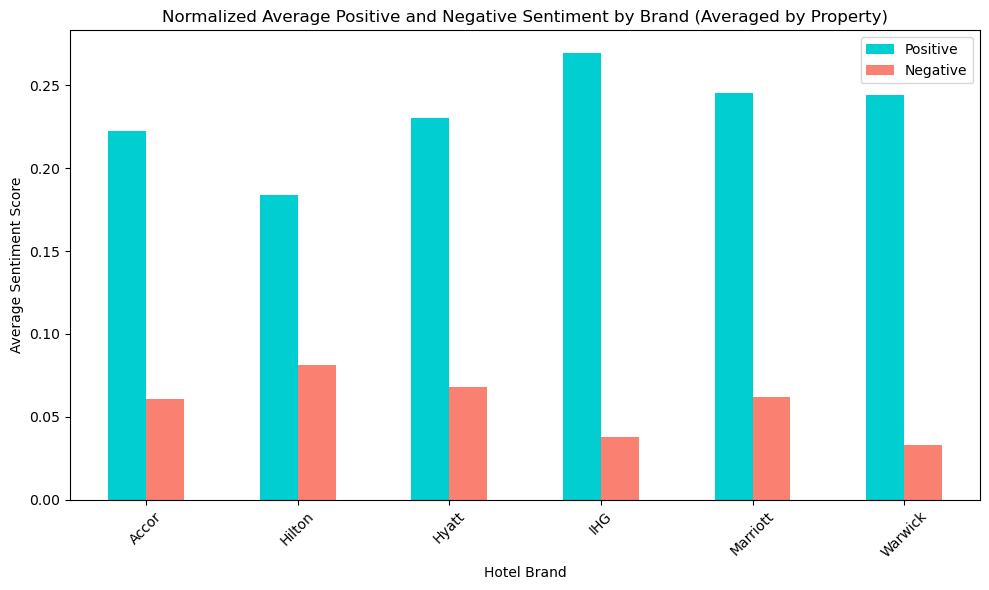

In [19]:
property_sentiment = df.groupby(['Brand', 'title'])[['Positive', 'Negative']].mean().reset_index()

mean_pos_neg_normalized = property_sentiment.groupby('Brand')[['Positive', 'Negative']].mean()

mean_pos_neg_normalized.plot(kind='bar', stacked=False, figsize=(10, 6), color=['darkturquoise', 'salmon'])
plt.title('Normalized Average Positive and Negative Sentiment by Brand (Averaged by Property)')
plt.xlabel('Hotel Brand')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('figures/Normalized Average Positive and Negative Sentiment by Brand (Averaged by Property).png', dpi=300)
plt.show()



This dual-axis view helps uncover the balance of guest feedback, not just volume — valuable for understanding brand health and emotional tone in guest interactions

IHG has the highest normalized positive sentiment and the lowest negative sentiment across all brands, reinforcing its brand strength not only in generating positive guest experiences but also in minimizing dissatisfaction. Hilton, in contrast, shows both the lowest positive and highest negative sentiment among the brands.”


In [20]:
property_sentiment

,Brand,title,Positive,Negative
0,Accor,Sofitel New York,0.222737,0.060816
1,Hilton,Hilton New York Times Square,0.183645,0.081226
2,Hyatt,"Dream Downtown, by Hyatt",0.238233,0.047070
3,Hyatt,Hyatt Grand Central New York,0.205853,0.087118
4,Hyatt,Hyatt Place New York City / Times Square,0.246222,0.070583
5,IHG,Hotel Indigo Lower East Side New York by IHG,0.187944,0.048444
6,IHG,InterContinental New York Barclay by IHG,0.260622,0.051541
7,IHG,"InterContinental New York Times Square, an IHG...",0.360821,0.013923
8,Marriott,"Marriott Vacation Club, New York City",0.304189,0.055865
9,Marriott,New York Marriott Downtown,0.277966,0.050207


Insight: IHG Dominates Sentiment Rankings Across All Levels of Aggregation

Across individual hotels, overall brand performance, and normalized sentiment (positive vs. negative), IHG stands out as the clear leader in guest satisfaction:

1.	Top Hotel Sentiment Leaders
The top two hotels with the highest average review sentiment scores are both IHG properties:
•	InterContinental New York Times Square and InterContinental New York Barclay score significantly above all others, indicating exceptional guest experiences at the property level.

2.	Brand-Level Sentiment Strength
•	IHG leads the pack in average compound sentiment when sentiment scores are averaged per brand, outperforming Warwick, Marriott, Accor, Hyatt, and especially Hilton — which shows the lowest sentiment by a wide margin, potentially signaling reputation or service issues.
	
3.	Positive vs. Negative Breakdown
IHG not only has the highest normalized positive sentiment but also one of the lowest normalized negative sentiment scores. This reflects both:
•	Strong guest satisfaction,
•	Effective mitigation of negative experiences.

Strategic Recommendation:

For competitive benchmarking or SEO audit presentation:
	•	IHG can serve as a benchmark brand when assessing how sentiment translates to reputation and potential local SEO performance.
	•	Conversely, Hilton should be analyzed further to uncover root causes behind low sentiment and identify opportunities for operational or customer experience improvements.


In [21]:
negative_reviews = df[df['Compound'] < 0]['Reviews']
custom_stopwords = set([
    "hotel", "room", "rooms", "stay", "staff", "location", "experience", "place"
])

vectorizer_negative = TfidfVectorizer(
    stop_words='english',
    max_features=50,
    token_pattern=r'\b[a-zA-Z]{3,}\b',  # words with 3+ letters
)

# Remove extra stop words manually
negative_reviews_cleaned = negative_reviews.str.lower().replace(r'\b(?:' + '|'.join(custom_stopwords) + r')\b', '', regex=True)
tfidf_matrix_negative = vectorizer_negative.fit_transform(negative_reviews_cleaned)

In [22]:
# Sum TF-IDF scores across all documents to get overall importance
tfidf_scores = tfidf_matrix_negative.sum(axis=0).A1
words = vectorizer_negative.get_feature_names_out()
tfidf_df_negative = pd.DataFrame({'word': words, 'tfidf': tfidf_scores})

# Sort by importance
tfidf_df_negative = tfidf_df_negative.sort_values(by='tfidf', ascending=False)
print(tfidf_df_negative.head(10))

       word      tfidf
37  service  11.060666
7     check   7.022001
22     like   7.002870
16     good   6.426913
48    water   6.311365
49    worst   6.168035
21     just   6.044728
9      desk   5.980997
35     rude   5.839506
26    night   5.723863


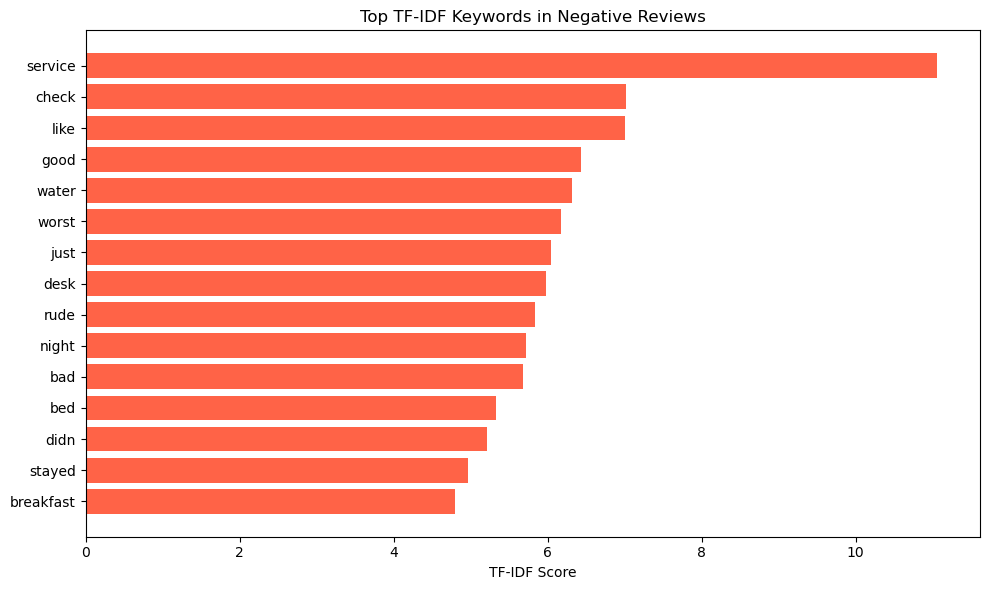

In [23]:
plt.figure(figsize=(10, 6))
plt.barh(tfidf_df_negative['word'].head(15), tfidf_df_negative['tfidf'].head(15), color='tomato')
plt.gca().invert_yaxis()
plt.title('Top TF-IDF Keywords in Negative Reviews')
plt.xlabel('TF-IDF Score')
plt.tight_layout()
plt.savefig('figures/Top TF-IDF Keywords in Negative Reviews.png', dpi=300)

plt.show()

Across 14 hotel properties in New York, guest sentiment consistently flagged issues related to staff interactions — particularly front desk service. Words such as ‘staff’, ‘desk’, ‘disappointed’, and ‘noise’ surfaced as top TF-IDF weighted terms in negative reviews. This points to a potential service training gap that spans multiple locations, warranting brand-level intervention.

In [24]:
positive_reviews = df[df['Compound'] > 0.4]['Reviews'].dropna()
# Clean text and remove custom stopwords
positive_reviews_cleaned = positive_reviews.str.lower().replace(
    r'\b(?:' + '|'.join(custom_stopwords) + r')\b', '', regex=True
)
# Create TF-IDF vectorizer
vectorizer_positive = TfidfVectorizer(
    stop_words='english',
    max_features=50,
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)

tfidf_matrix_positive = vectorizer_positive.fit_transform(positive_reviews_cleaned)

words_positive = vectorizer_positive.get_feature_names_out()
tfidf_scores_positive = tfidf_matrix_positive.sum(axis=0).A1

tfidf_df_positive = pd.DataFrame({'word': words_positive, 'tfidf': tfidf_scores_positive})
tfidf_df_positive = tfidf_df_positive.sort_values(by='tfidf', ascending=False)

print(tfidf_df_positive.head(10))


         word      tfidf
21      great  42.409445
40    service  32.600477
20       good  27.756107
31       nice  27.369280
7       clean  24.650642
19   friendly  21.661069
3   breakfast  18.658737
42     square  18.033378
46      times  17.610043
15  excellent  17.145084


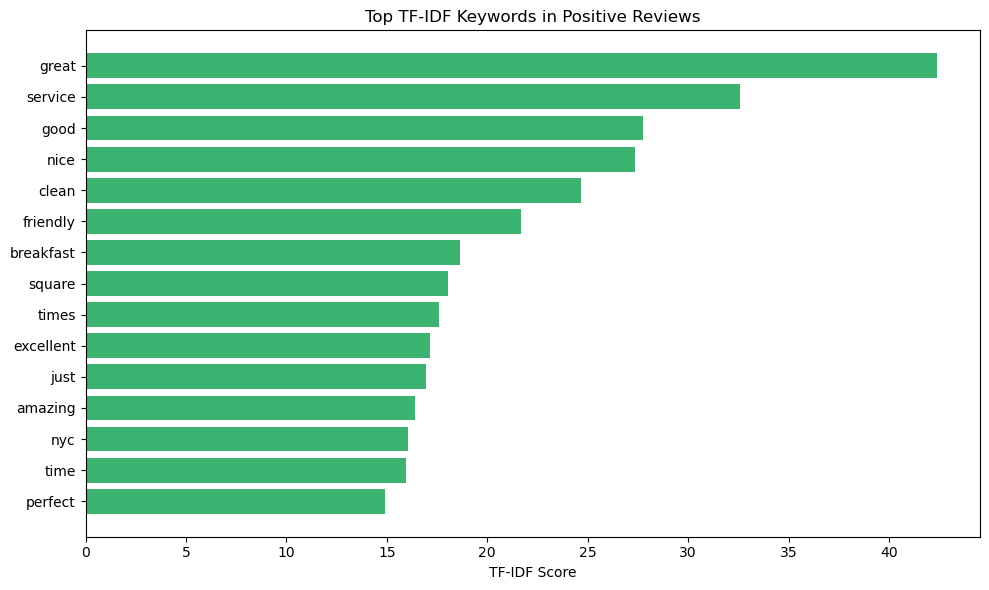

In [25]:

plt.figure(figsize=(10, 6))
plt.barh(tfidf_df_positive['word'].head(15), tfidf_df_positive['tfidf'].head(15), color='mediumseagreen')
plt.gca().invert_yaxis()
plt.title('Top TF-IDF Keywords in Positive Reviews')
plt.xlabel('TF-IDF Score')
plt.tight_layout()
plt.savefig('figures/Top TF-IDF Keywords in Positive Reviews.png', dpi=300)
plt.show()

# Marriott Property Focus 

In [26]:
# Filter Marriott reviews only
marriott_prop = df[df['Brand'] == 'Marriott']['title'].unique()
selected_marriott = np.random.choice(marriott_prop, size=3, replace=False)
marriott_df = df[df['title'].isin(selected_marriott)].copy()
marriott_df

,title,Date,UserID,Reviews,Location Rating,Rooms Rating,Service Rating,stars,Owner Response Date,Owner Response,Brand,Negative,Neutral,Positive,Compound
20,W New York - Times Square,6/6/25 0:52,42757,the soap bottle pump didn’t work and had an ol...,NaN,NaN,NaN,1,NaN,NaN,Marriott,0.000,1.000,0.000,0.0000
21,W New York - Times Square,6/5/25 16:45,63670,great staff at check in and very nice room. ba...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.639,0.361,0.9059
22,W New York - Times Square,6/3/25 19:36,67368,dope bar,5.0,4.0,5.0,5,NaN,NaN,Marriott,0.000,1.000,0.000,0.0000
25,W New York - Times Square,6/1/25 6:08,24929,nice hotel,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.263,0.737,0.4215
26,W New York - Times Square,5/31/25 13:36,27190,the hotel was clean but we think there can be ...,4.0,4.0,4.0,5,NaN,NaN,Marriott,0.000,0.882,0.118,0.6249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,New York Marriott Marquis,5/23/25 15:29,12244,great view of times square. great breakfast!,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.371,0.629,0.8588
695,New York Marriott Marquis,5/23/25 11:51,16576,the service is terrible! workers are talking a...,5.0,4.0,1.0,3,NaN,NaN,Marriott,0.188,0.679,0.133,-0.3094
696,New York Marriott Marquis,5/23/25 10:19,43120,a lot of great service and people,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.594,0.406,0.6249
697,New York Marriott Marquis,5/22/25 16:43,38436,what can i say... fabulous!!! we had an unforg...,5.0,5.0,5.0,5,NaN,NaN,Marriott,0.000,0.586,0.414,0.7946


In [27]:
marriott_positive_reviews = marriott_df[
    (marriott_df['Brand'] == 'Marriott') & (marriott_df['Compound'] > 0.4)
]['Reviews'].dropna().str.lower()
marriott_positive_reviews

21     great staff at check in and very nice room. ba...
25                                            nice hotel
26     the hotel was clean but we think there can be ...
27     a great hotel in the heart of new york that al...
28          great rooms! nice and close to times square!
                             ...                        
693    cool hotel - nyc classic! was there for an eve...
694         great view of times square. great breakfast!
696                    a lot of great service and people
697    what can i say... fabulous!!! we had an unforg...
699    i am lifetime marriott platinum member and app...
Name: Reviews, Length: 63, dtype: object

In [28]:
marriott_reviews_cleaned = marriott_positive_reviews.replace(
    r'\b(?:' + '|'.join(custom_stopwords) + r')\b', '', regex=True
)

# 3. Run TF-IDF
vectorizer_marriott_positive = TfidfVectorizer(
    stop_words='english',
    max_features=50,
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)

tfidf_matrix_marriott_positive = vectorizer_marriott_positive.fit_transform(marriott_reviews_cleaned)
words_marriott_positive = vectorizer_marriott_positive.get_feature_names_out()
tfidf_scores_marriott_positive = tfidf_matrix_marriott_positive.sum(axis=0).A1

# 4. Create and display results
tfidf_df_marriott_positive = pd.DataFrame({'word': words_marriott_positive, 'tfidf': tfidf_scores_marriott_positive})
tfidf_df_marriott_positive = tfidf_df_marriott_positive.sort_values(by='tfidf', ascending=False)

print(tfidf_df_marriott_positive.head(10))


        word     tfidf
21     great  7.805671
41    square  6.853516
19      good  6.213179
45     times  6.037098
34      nice  5.794755
38   service  5.703392
35       nyc  5.079049
7      clean  4.161792
44      time  3.850213
32  marriott  3.526344


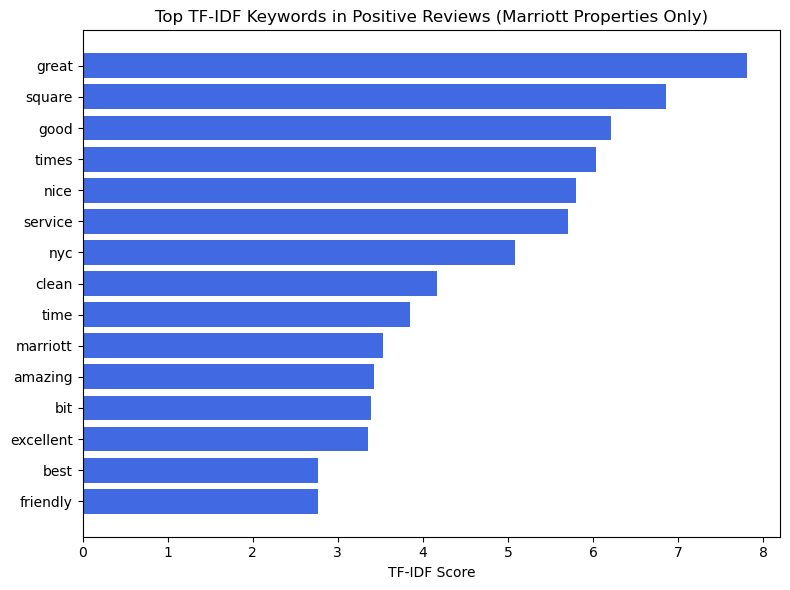

In [29]:
plt.figure(figsize=(8, 6))
plt.barh(tfidf_df_marriott_positive['word'].head(15), tfidf_df_marriott_positive['tfidf'].head(15), color='royalblue')
plt.gca().invert_yaxis()
plt.title('Top TF-IDF Keywords in Positive Reviews (Marriott Properties Only)')
plt.xlabel('TF-IDF Score')
plt.savefig('figures/Top TF-IDF Keywords in Positive Reviews (Marriott Properties Only).png', dpi=300)
plt.tight_layout()
plt.show()

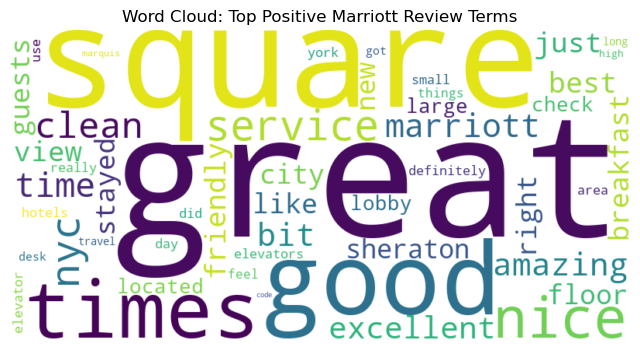

In [30]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(tfidf_df_marriott_positive['word'], tfidf_df_marriott_positive['tfidf']))
)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Top Positive Marriott Review Terms")
plt.savefig('figures/ Word Cloud: Top Positive Marriott Review Terms.png', dpi=300)
plt.show()

In [31]:
marriott_negative_reviews = marriott_df[
    (marriott_df['Brand'] == 'Marriott') & (marriott_df['Compound'] < 0)
]['Reviews'].dropna().str.lower()
marriott_negative_reviews

32     do not book the times square view room. it is ...
34     the hotel is actually really gross. dirty and ...
62     i paid 1500 for one night for wednesday in the...
410    i would really give a negative if possible. th...
415              very bad and the worst hotel i had been
416    i stayed here for a conference and unfortunate...
424    the room i stayed in was extremely outdated an...
432    i was disappointed with my recent stay at the ...
434    the room is very dated. furniture has clear we...
437                   nice location, terrible elevators.
440    the only good thing is the location of this pr...
445    checkin during construction is abysmal - no ef...
447               disappointing for a marriott property.
450    a very central hotel, right next to the metro ...
451    the hotel was clean and such despite construct...
600    i have been staying in this hotel for over 20 ...
603    unfortunately very dissapointed on the total t...
608    we are currently staying

In [32]:
marriott_negative_cleaned = marriott_negative_reviews.replace(
    r'\b(?:' + '|'.join(custom_stopwords) + r')\b', '', regex=True
)
vectorizer_marriott_negative = TfidfVectorizer(
    stop_words='english',
    max_features=50,
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)
tfidf_matrix_marriott_negative = vectorizer_marriott_negative.fit_transform(marriott_negative_cleaned)
words_marriott_negative = vectorizer_marriott_negative.get_feature_names_out()
tfidf_scores_marriott_negative = tfidf_matrix_marriott_negative.sum(axis=0).A1

tdidf_marriott_negative = pd.DataFrame({'word': words_marriott_negative, 'tfidf': tfidf_scores_marriott_negative})
tdidf_marriott_negative = tdidf_marriott_negative.sort_values(by='tfidf', ascending=False)
print(tdidf_marriott_negative.head(10))

        word     tfidf
9       desk  1.957855
27  marriott  1.884766
45  terrible  1.864612
38   service  1.794976
42   staying  1.647567
18      good  1.634899
32      paid  1.610603
33    people  1.582877
49     worst  1.446811
48      view  1.407807


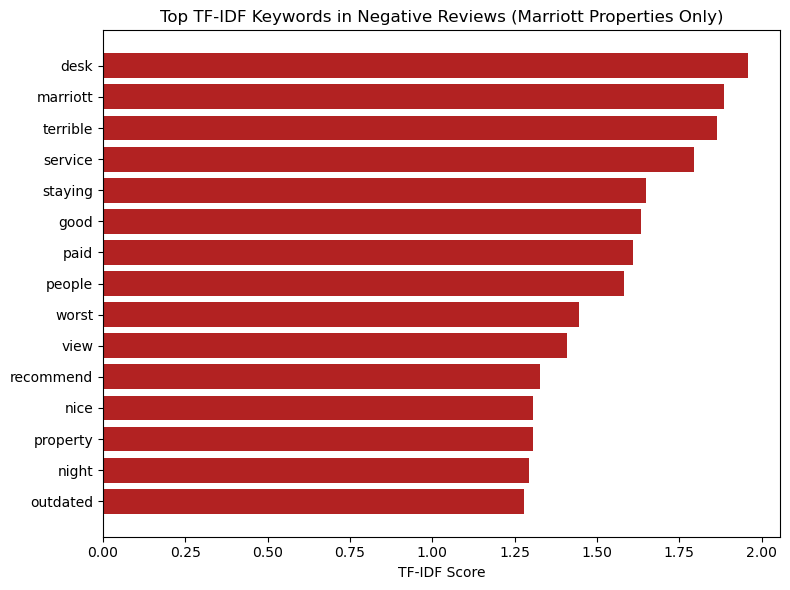

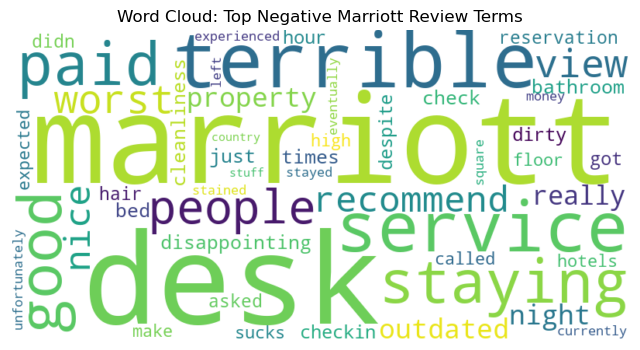

In [33]:
plt.figure(figsize=(8, 6))
plt.barh(tdidf_marriott_negative['word'].head(15), tdidf_marriott_negative['tfidf'].head(15), color='firebrick')
plt.gca().invert_yaxis()
plt.title('Top TF-IDF Keywords in Negative Reviews (Marriott Properties Only)')
plt.xlabel('TF-IDF Score')
plt.tight_layout()
plt.savefig('figures/Top TF-IDF Keywords in Negative Reviews (Marriott Properties Only).png', dpi=300)
plt.show()
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(tdidf_marriott_negative['word'], tdidf_marriott_negative['tfidf']))
)
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Top Negative Marriott Review Terms")
plt.savefig('figures/Word Cloud: Top Negative Marriott Review Terms.png', dpi=300)
plt.show()

In [34]:
#Extracting all reviews containing the word "great" from marriott_positive_reviews
great_reviews = marriott_positive_reviews[marriott_positive_reviews.str.contains(r'great', na=False)]

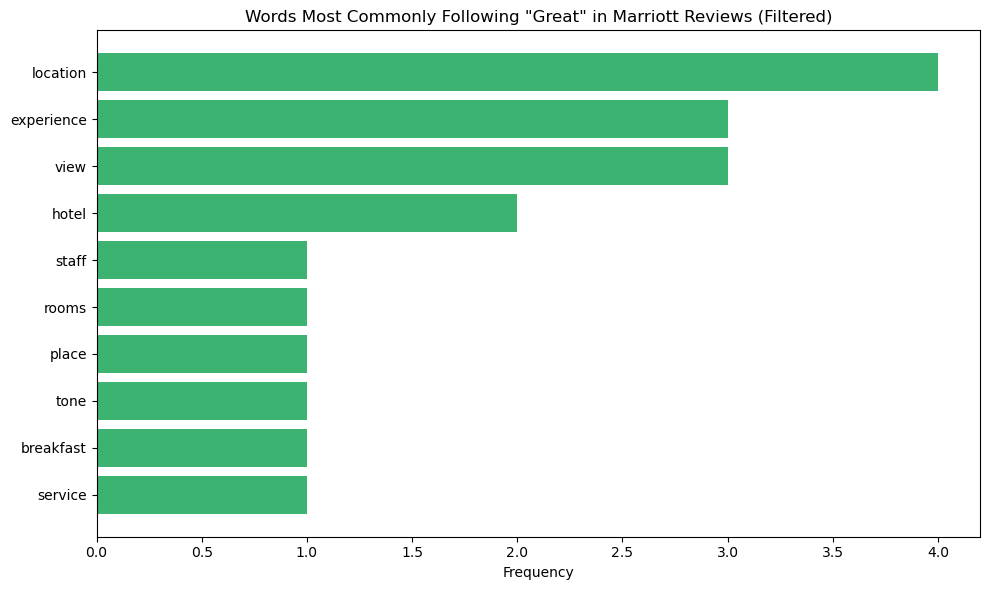

In [35]:
# Custom set of stopwords (optional: expand it)
common_stopwords = set(stopwords.words('english')).union(set(string.punctuation))

# Focus on tokens that follow 'great'
following_words = []

for review in great_reviews:
    tokens = word_tokenize(review.lower())
    for i, word in enumerate(tokens[:-1]):
        next_word = tokens[i+1]
        if word == "great" and next_word not in common_stopwords:
            following_words.append(next_word)

# Count and plot
follow_counts = Counter(following_words).most_common(10)
words, counts = zip(*follow_counts)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='mediumseagreen')
plt.xlabel("Frequency")
plt.title('Words Most Commonly Following "Great" in Marriott Reviews (Filtered)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/Words Most Commonly Following "Great" in Marriott Reviews (Filtered).png', dpi=300)
plt.show()

This chart highlights the top words that follow the adjective "great" in Marriott guest reviews. The dominance of the word "location" suggests a strong emphasis on geographic convenience and proximity as a key driver of positive sentiment.

**Goal: Turn raw guest reviews into clear themes, split by praise vs. issues, and spot what’s rising lately.**

Pipeline at a glance
	1.	Clean the text
Lowercase → remove URLs/punctuation → tokenize → remove stopwords → lemmatize → join back.
	2.	Score sentiment (VADER)
For each review we compute Negative, Neutral, Positive, and Compound (overall polarity).
	3.	Split by sentiment
	    •	Positive set: Compound ≥ 0.05 (praise)
	    •	Negative set: Compound ≤ −0.05 (issues)
	4.	Find themes with clustering (per set)
	    •	Convert text to TF-IDF features (1–3 word n-grams).
	    •	Auto-select k (number of clusters) using silhouette.
	    •	K-Means groups similar reviews → each group = a theme.
	    •	Create a quick label for each theme from its top keywords.
	5.	Name the themes (human labels)
Map numeric cluster IDs to readable names (e.g., “Friendly Staff & Clean Rooms”). If IDs shift in the future, we fall back to the auto keyword label.
	6.	Track themes over time
Bucket reviews by month and count mentions per theme to make simple time series.
	7.	Detect “emerging themes” (recent ↑ vs prior)
For each theme:
    	•	recent_count = mentions in the last N months
    	•	prior_count = mentions in the N months before that
    	•	delta = recent − prior
    	•	pct_change = (recent − prior) / prior (guarded if prior=0)
    	•	Emerging Score = delta × (1 + clip(pct_change, 0, 5))
Bigger score = theme that’s growing fast and growing a lot.
	8.	Visuals & outputs
    	•	Bar charts: top emerging praise and issue themes.
    	•	Line charts: monthly trend for the #1 emerging theme (per side).
    	•	Tables:
    	•	all_clusters = every review with its theme + sentiment
    	•	all_emerging = ranked emerging themes (counts, deltas, % change)


In [36]:
import re, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from datetime import datetime

# ------------------
# NLTK setup
# ------------------
import nltk
for pkg in ["punkt", "stopwords", "wordnet", "omw-1.4", "vader_lexicon"]:
    try:
        # punkt is a tokenizer, others are corpora; adjust lookup path accordingly
        if pkg == "punkt":
            nltk.data.find(f"tokenizers/{pkg}")
        else:
            nltk.data.find(f"corpora/{pkg}")
    except LookupError:
        nltk.download(pkg, quiet=True)

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Sentiment
from nltk.sentiment import SentimentIntensityAnalyzer


# ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Viz
import matplotlib.pyplot as plt

Positive reviews: 394 | Negative reviews: 78

[POS] Chosen k = 5
[POS] Cluster 0 — excellent • location • room • staff
   excellent, location, room, staff, service, comfortable, hotel, spacious, bed, comfortable bed


,Date,Brand,title,Reviews
257,2025-06-06 17:24:00,Hyatt,Hyatt Grand Central New York,outdated hotel. rooms not equipped. no coffee ...
230,2025-06-06 13:15:00,Hilton,Hilton New York Times Square,everything is perfect about this hotel from lo...
260,2025-06-03 14:41:00,Hyatt,Hyatt Grand Central New York,"if i could rate the service a zero, i would. t..."


[POS] Cluster 1 — room • hotel • nice • clean
   room, hotel, nice, clean, staff, stay, breakfast, like, location, friendly


,Date,Brand,title,Reviews
292,2025-06-05 17:28:00,Marriott,Sheraton New York Times Square Hotel,i was frightened when i saw so many bads comme...
12,2025-06-05 16:45:00,Marriott,W New York - Times Square,great staff at check in and very nice room. ba...
54,2025-06-05 11:35:00,Hyatt,"Dream Downtown, by Hyatt",i had the pleasure of visiting dream downtown....


[POS] Cluster 2 — great • great location • location • service
   great, great location, location, service, stay, great service, helpful, room, hotel, friendly


,Date,Brand,title,Reviews
258,2025-06-06 15:48:00,Hyatt,Hyatt Grand Central New York,not exceptions for globalist. no thanks.
427,2025-06-06 13:42:00,Marriott,New York Marriott Marquis,my very favorite place to stay when in nyc. mi...
55,2025-06-05 11:25:00,Hyatt,"Dream Downtown, by Hyatt",didn’t stay in the hotel but came to visit the...


[POS] Cluster 3 — good • eddie • best • hotel
   good, eddie, best, hotel, bar, service, restaurant, location, great, credit


,Date,Brand,title,Reviews
351,2025-06-06 19:42:00,IHG,"InterContinental New York Times Square, an IHG...","honestly as a professional who travels a lot, ..."
352,2025-06-06 16:24:00,IHG,"InterContinental New York Times Square, an IHG...",great hotel and food in the restaurant. our wa...
353,2025-06-05 16:06:00,IHG,"InterContinental New York Times Square, an IHG...",execellent service by eddie spaguetti. thank you


[POS] Cluster 4 — time • time square • square • hotel
   time, time square, square, hotel, room, stay, marriott, great, location, staff


,Date,Brand,title,Reviews
125,2025-06-07 08:07:00,IHG,InterContinental New York Barclay by IHG,huge thank you to sophy through check in and c...
255,2025-06-06 23:15:00,Hyatt,Hyatt Grand Central New York,i wish i could give the hotel zero stars the r...
294,2025-06-04 22:38:00,Marriott,Sheraton New York Times Square Hotel,i've stayed at this hotel two times now. first...



[POS] Emerging Themes Window: 2025-04-01 → 2025-06-01


,Topic_Cluster,Topic_Label,recent_count,prior_count,delta,pct_change,emerging_score
1,1,room • hotel • nice • clean,140,13,127,9.769231,762.0
4,4,time • time square • square • hotel,80,6,74,12.333333,444.0
2,2,great • great location • location • service,53,8,45,5.625000,270.0
3,3,good • eddie • best • hotel,48,6,42,7.000000,252.0
0,0,excellent • location • room • staff,33,2,31,15.500000,186.0



[NEG] Chosen k = 5
[NEG] Cluster 0 — hotel • service • worst • bad
   hotel, service, worst, bad, dirty, terrible, worst hotel, customer, star, breakfast


,Date,Brand,title,Reviews
290,2025-06-06 15:51:00,Marriott,Sheraton New York Times Square Hotel,very bad and the worst hotel i had been
191,2025-06-05 16:17:00,Accor,Sofitel New York,you have worked very hard to make this hotel r...
80,2025-06-03 22:51:00,Hyatt,Hyatt Place New York City / Times Square,"if i can give 0 star, i will give 0 star. the ..."


[NEG] Cluster 1 — check • room • hour • water
   check, room, hour, water, bathroom, location, working, elevator, available, asked


,Date,Brand,title,Reviews
426,2025-06-07 11:29:00,Marriott,New York Marriott Marquis,i have been staying in this hotel for over 20 ...
289,2025-06-07 03:36:00,Marriott,Sheraton New York Times Square Hotel,i would really give a negative if possible. th...
441,2025-06-05 14:12:00,Marriott,"Marriott Vacation Club, New York City",will never stay again. got asked to come to th...


[NEG] Cluster 2 — property • guest • room • service
   property, guest, room, service, hotel, time, experience, marriott property, wait, short


,Date,Brand,title,Reviews
256,2025-06-06 17:57:00,Hyatt,Hyatt Grand Central New York,this is the worst hyatt property i have seen a...
79,2025-06-06 09:32:00,Hyatt,Hyatt Place New York City / Times Square,disappointed by service.\nwe recently stayed a...
428,2025-06-04 23:37:00,Marriott,New York Marriott Marquis,unfortunately very dissapointed on the total t...


[NEG] Cluster 3 — floor • room • hotel • night
   floor, room, hotel, night, noise, sleep, club, terrible, elevator, vacation


,Date,Brand,title,Reviews
78,2025-06-07 12:47:00,Hyatt,Hyatt Place New York City / Times Square,the room was over 300$ and the thermostat didn...
291,2025-06-06 12:38:00,Marriott,Sheraton New York Times Square Hotel,i stayed here for a conference and unfortunate...
316,2025-05-27 12:23:00,Marriott,Sheraton New York Times Square Hotel,"a very central hotel, right next to the metro ..."


[NEG] Cluster 4 — rude • staff rude • staff • stay
   rude, staff rude, staff, stay, hotel, worker, disgusting, highly, recommended, highly recommended


,Date,Brand,title,Reviews
52,2025-06-07 02:32:00,Hyatt,"Dream Downtown, by Hyatt",bald manger of phd is very rude . as a guest o...
59,2025-06-03 15:33:00,Hyatt,"Dream Downtown, by Hyatt",i would rate negative zero stars if i could. i...
480,2025-05-27 16:05:00,Marriott,New York Marriott Marquis,so rude



[NEG] Emerging Themes Window: 2025-04-01 → 2025-06-01


,Topic_Cluster,Topic_Label,recent_count,prior_count,delta,pct_change,emerging_score
1,1,check • room • hour • water,20,1.0,19.0,19.0,114.0
0,0,hotel • service • worst • bad,18,0.0,18.0,inf,108.0
2,2,property • guest • room • service,14,2.0,12.0,6.0,72.0
3,3,floor • room • hotel • night,13,1.0,12.0,12.0,72.0
4,4,rude • staff rude • staff • stay,9,0.0,9.0,inf,54.0


,Sentiment,Topic_Cluster,Theme_Label,Topic_Label,recent_count,prior_count,delta,pct_change,emerging_score
5,Negative,1,Poor Sleep & Room Conditions,check • room • hour • water,20,1.0,19.0,19.000000,114.0
6,Negative,0,Value/Cost Complaints (Uber/Taxi Comparisons),hotel • service • worst • bad,18,0.0,18.0,inf,108.0
7,Negative,2,Service Quality & Elite-Benefit Frustrations,property • guest • room • service,14,2.0,12.0,6.000000,72.0
8,Negative,3,Check-In Delays & Room Availability,floor • room • hotel • night,13,1.0,12.0,12.000000,72.0
9,Negative,4,Rude Staff & Hidden Fees,rude • staff rude • staff • stay,9,0.0,9.0,inf,54.0
0,Positive,1,Friendly Staff & Clean Rooms,room • hotel • nice • clean,140,13.0,127.0,9.769231,762.0
1,Positive,4,Excellent Service & Location,time • time square • square • hotel,80,6.0,74.0,12.333333,444.0
2,Positive,2,Prime Location (Times Square / Broadway),great • great location • location • service,53,8.0,45.0,5.625000,270.0
3,Positive,3,Overall Good Stay & Convenience,good • eddie • best • hotel,48,6.0,42.0,7.000000,252.0
4,Positive,0,Staff Recognition / Employee Praise,excellent • location • room • staff,33,2.0,31.0,15.500000,186.0


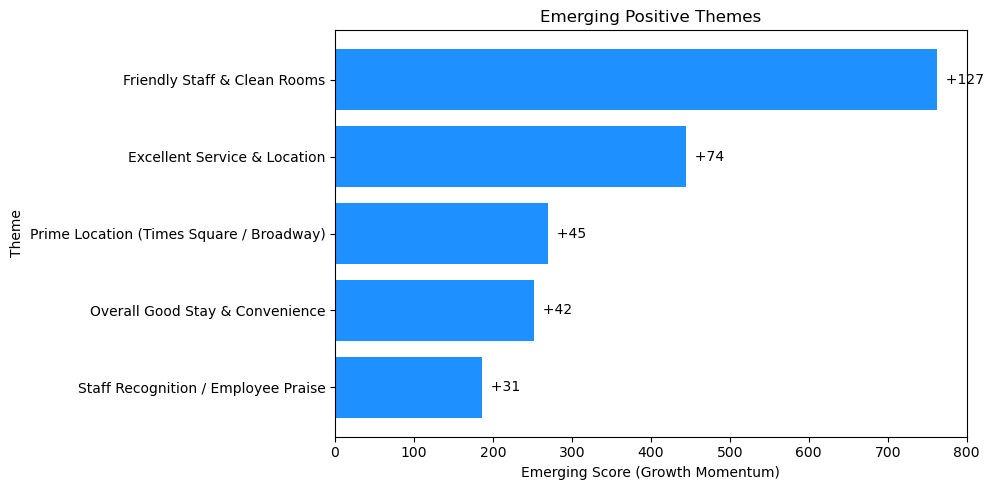

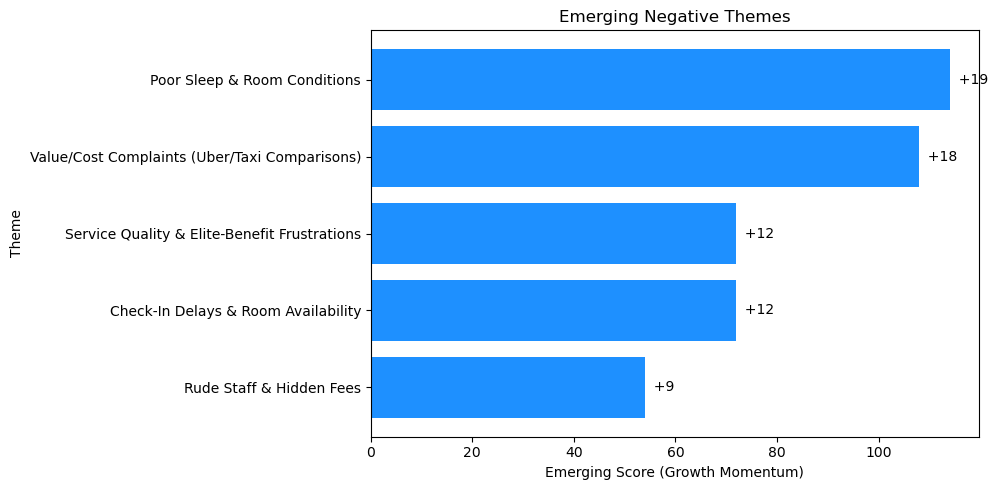

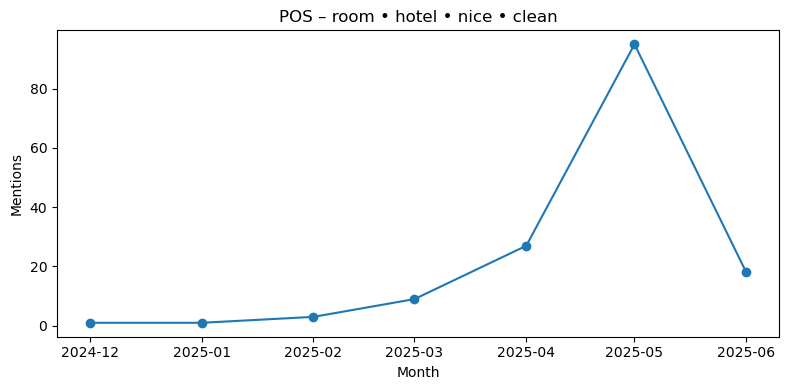

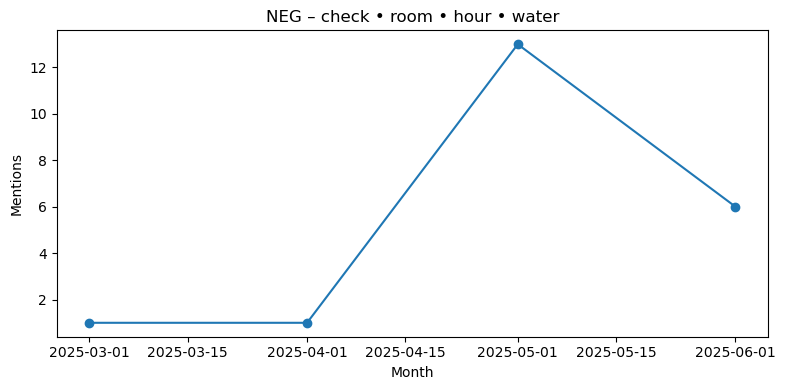


Top EMERGING PRAISE Themes (recent vs prior):
 - Friendly Staff & Clean Rooms: Δ 127, recent 140, prior 13
 - Excellent Service & Location: Δ 74, recent 80, prior 6
 - Prime Location (Times Square / Broadway): Δ 45, recent 53, prior 8

Top EMERGING ISSUES Themes (recent vs prior):
 - Poor Sleep & Room Conditions: Δ 19, recent 20, prior 1
 - Value/Cost Complaints (Uber/Taxi Comparisons): Δ 18, recent 18, prior 0
 - Service Quality & Elite-Benefit Frustrations: Δ 12, recent 14, prior 2


In [37]:
# Configuration
CFG = {
    "min_df": 2,
    "max_features": 6000,
    "ngram_range_pos": (1,3),
    "ngram_range_neg": (1,3),
    "k_search": (3,4,5,6),
    "recent_months": 3,
    "prior_months": 3,
    "sentiment_pos_thresh": 0.05,
    "sentiment_neg_thresh": -0.05,
}

# ============================================================
# 1) INPUT SANITY + CLEANING
# df must have: Reviews (str), Date (str/dt). Optional: Brand, title
# ============================================================
assert 'Reviews' in df.columns, "df must have a 'Reviews' column."
assert 'Date' in df.columns, "df must have a 'Date' column."

# ============================================================
# Hospitality Reviews NLP Pipeline (Full Rewrite)
# - Cleaning + VADER sentiment
# - Sentiment-split TF-IDF + KMeans clustering (auto-k)
# - Human-readable theme naming
# - Emerging themes (recent vs prior window)
# - Trend & bar plots
# - Unified exports (optional)
# ============================================================

df = df.copy()
df['Reviews'] = df['Reviews'].fillna('').astype(str)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df[(df['Reviews'].str.strip() != '') & df['Date'].notna()].reset_index(drop=True)

STOP = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text: str) -> str:
    text = str(text).lower()
    text = re.sub(r"http\S+|www\.\S+", " ", text)        # URLs
    text = re.sub(r"[^a-z0-9\s']", " ", text)           # keep letters/digits/apostrophes
    toks = word_tokenize(text)
    toks = [t for t in toks if t.isalpha() and t not in STOP]
    toks = [lemmatizer.lemmatize(t) for t in toks]
    return " ".join(toks)

df['Reviews_clean'] = df['Reviews'].apply(preprocess)

# ============================================================
# SENTIMENT (VADER)
sia = SentimentIntensityAnalyzer()
scores = df['Reviews_clean'].apply(sia.polarity_scores)
df['Negative'] = scores.apply(lambda x: x['neg'])
df['Neutral']  = scores.apply(lambda x: x['neu'])
df['Positive'] = scores.apply(lambda x: x['pos'])
df['Compound'] = scores.apply(lambda x: x['compound'])

# ============================================================
# SENTIMENT SPLIT
pos_df = df[df['Compound'] >= CFG["sentiment_pos_thresh"]].copy()
neg_df = df[df['Compound'] <= CFG["sentiment_neg_thresh"]].copy()
print(f"Positive reviews: {len(pos_df)} | Negative reviews: {len(neg_df)}")

# ============================================================
# HELPERS
def choose_k(X, k_list=(3,4,5,6), random_state=42):
    best = (-1, None, None)  # (score, k, model)
    for k in k_list:
        km = KMeans(n_clusters=k, random_state=random_state, n_init=10)
        labels = km.fit_predict(X)
        if 1 < len(set(labels)) < X.shape[0]:
            s = silhouette_score(X, labels, sample_size=min(1000, X.shape[0]))
            if s > best[0]:
                best = (s, k, km)
    if best[2] is None:
        k = 4
        km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
        return k, km
    return best[1], best[2]

def label_clusters(model, terms, topn=10, label_topn=4):
    labels, tops = {}, {}
    for i in range(model.n_clusters):
        idx = np.argsort(model.cluster_centers_[i])[-topn:][::-1]
        top_terms = [terms[j] for j in idx]
        tops[i] = top_terms
        labels[i] = " • ".join(top_terms[:label_topn])
    return labels, tops

def sample_reviews(df_subset, cluster_col, cluster_id, n=3):
    cols = ['Date', 'Reviews']
    if 'title' in df_subset.columns: cols = ['Date', 'title', 'Reviews']
    if 'Brand' in df_subset.columns:
        cols = ['Date','Brand','title','Reviews'] if 'title' in df_subset.columns else ['Date','Brand','Reviews']
    return (df_subset[df_subset[cluster_col] == cluster_id]
            .sort_values('Date', ascending=False)
            .head(n)[cols])

def emerging_scores(topic_month_counts, recent_months=3, prior_months=3):
    """Return ranked emerging table + (recent_start, last_month)."""
    if topic_month_counts.empty:
        return pd.DataFrame(), (None, None)
    last_month = topic_month_counts['year_month'].max()
    recent_start = (last_month - pd.offsets.MonthBegin(recent_months - 1)).normalize()
    prior_start  = (recent_start - pd.offsets.MonthBegin(prior_months)).normalize()

    recent = (topic_month_counts[topic_month_counts['year_month'] >= recent_start]
              .groupby(['Topic_Cluster','Topic_Label'])['count'].sum()
              .rename('recent_count'))
    prior  = (topic_month_counts[(topic_month_counts['year_month'] >= prior_start) &
                                 (topic_month_counts['year_month'] <  recent_start)]
              .groupby(['Topic_Cluster','Topic_Label'])['count'].sum()
              .rename('prior_count'))

    comp = pd.concat([recent, prior], axis=1).fillna(0).reset_index()
    comp['delta'] = comp['recent_count'] - comp['prior_count']
    comp['pct_change'] = np.where(
        comp['prior_count'] > 0,
        (comp['recent_count'] - comp['prior_count']) / comp['prior_count'],
        np.where(comp['recent_count'] > 0, np.inf, 0)
    )
    comp['emerging_score'] = comp['delta'] * (1 + np.clip(comp['pct_change'], 0, 5))
    return comp.sort_values('emerging_score', ascending=False), (recent_start, last_month)

def run_kmeans_subset(subset, tag="POS", k_list=(3,4,5,6), max_features=6000, ngram_range=(1,3)):
    """TF-IDF + auto-k KMeans on a sentiment subset."""
    if subset.empty:
        print(f"[{tag}] No reviews to cluster.")
        return subset, pd.DataFrame(), (None, None), {}, None

    vec = TfidfVectorizer(max_features=max_features, stop_words='english', ngram_range=ngram_range, min_df=CFG["min_df"])
    X = vec.fit_transform(subset['Reviews_clean'])
    terms = vec.get_feature_names_out()

    k, model = choose_k(X, k_list=k_list)
    subset = subset.copy()
    subset['Topic_Cluster'] = model.fit_predict(X)

    cluster_labels, cluster_top_terms = label_clusters(model, terms, topn=10, label_topn=4)
    subset['Topic_Label'] = subset['Topic_Cluster'].map(cluster_labels)

    print(f"\n[{tag}] Chosen k = {k}")
    for i in range(k):
        print(f"[{tag}] Cluster {i} — {cluster_labels.get(i, str(i))}")
        print("   " + ", ".join(cluster_top_terms.get(i, [])))
        try:
            display(sample_reviews(subset, 'Topic_Cluster', i, n=3))
        except Exception:
            print(sample_reviews(subset, 'Topic_Cluster', i, n=3).to_string(index=False))

    # Monthly aggregation for trends/emerging
    subset['year_month'] = subset['Date'].dt.to_period('M').dt.to_timestamp()
    topic_month = (subset
                   .groupby(['year_month','Topic_Cluster','Topic_Label'])
                   .size().reset_index(name='count'))
    emerging_tbl, (win_start, win_end) = emerging_scores(
        topic_month,
        recent_months=CFG["recent_months"],
        prior_months=CFG["prior_months"]
    )

    print(f"\n[{tag}] Emerging Themes Window:",
          f"{win_start.date()} → {win_end.date()}" if win_start is not None else "Not enough dated data.")
    try:
        display(emerging_tbl.head(10))
    except Exception:
        print(emerging_tbl.head(10).to_string(index=False))

    return subset, emerging_tbl, (win_start, win_end), cluster_labels, model

# ============================================================
# RUN CLUSTERING (POS / NEG)
pos_clusters, pos_emerging, pos_window, pos_labels, pos_model = run_kmeans_subset(
    pos_df, tag="POS", k_list=CFG["k_search"], max_features=CFG["max_features"], ngram_range=CFG["ngram_range_pos"]
)
neg_clusters, neg_emerging, neg_window, neg_labels, neg_model = run_kmeans_subset(
    neg_df, tag="NEG", k_list=CFG["k_search"], max_features=CFG["max_features"], ngram_range=CFG["ngram_range_neg"]
)
# ============================================================
# HUMAN-FRIENDLY THEME NAMES (you can edit these)
pos_theme_map = {
    0: "Staff Recognition / Employee Praise",
    1: "Friendly Staff & Clean Rooms",
    2: "Prime Location (Times Square / Broadway)",
    3: "Overall Good Stay & Convenience",
    4: "Excellent Service & Location",
    5: "Beautiful Rooms & Ambience"
}
neg_theme_map = {
    0: "Value/Cost Complaints (Uber/Taxi Comparisons)",
    1: "Poor Sleep & Room Conditions",
    2: "Service Quality & Elite-Benefit Frustrations",
    3: "Check-In Delays & Room Availability",
    4: "Rude Staff & Hidden Fees",
    5: "Room/Amenities Problems (Water/Size/‘0-Star’)"
}

pos_clusters['Sentiment'] = 'Positive'
neg_clusters['Sentiment'] = 'Negative'

def safe_coerce_cluster_col(df, col='Topic_Cluster'):
    if isinstance(df, pd.DataFrame) and col in df.columns:
        df = df.copy()
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # keep NaNs as-is for emerging tables where cluster may be absent
        return df
    return df

pos_clusters = safe_coerce_cluster_col(pos_clusters)
neg_clusters = safe_coerce_cluster_col(neg_clusters)
if isinstance(pos_emerging, pd.DataFrame):
    pos_emerging = safe_coerce_cluster_col(pos_emerging)
if isinstance(neg_emerging, pd.DataFrame):
    neg_emerging = safe_coerce_cluster_col(neg_emerging)

def apply_theme_map(df, theme_map, fallback_col='Topic_Label'):
    if not isinstance(df, pd.DataFrame) or df.empty:
        return df
    df = df.copy()
    # Map using integers where possible, otherwise fallback to Topic_Label
    def map_label(val):
        try:
            iv = int(val)
        except Exception:
            return None
        return theme_map.get(iv)
    df['Theme_Label'] = df['Topic_Cluster'].apply(map_label)
    if fallback_col in df.columns:
        df['Theme_Label'] = df['Theme_Label'].fillna(df[fallback_col].astype(str))
    df['Theme_Label'] = df['Theme_Label'].fillna(df['Topic_Cluster'].apply(lambda x: f"Cluster {int(x)}" if pd.notna(x) else "Cluster NA"))
    return df

pos_clusters = apply_theme_map(pos_clusters, pos_theme_map)
neg_clusters = apply_theme_map(neg_clusters, neg_theme_map)
if isinstance(pos_emerging, pd.DataFrame):
    pos_emerging = apply_theme_map(pos_emerging, pos_theme_map)
if isinstance(neg_emerging, pd.DataFrame):
    neg_emerging = apply_theme_map(neg_emerging, neg_theme_map)

# Review-level labeled dataset
all_clusters = pd.concat([pos_clusters, neg_clusters], ignore_index=True)
keep_cols = ['Date','Brand','title','Reviews','Compound','Negative','Neutral','Positive',
             'Topic_Cluster','Topic_Label','Theme_Label','Sentiment','year_month']
all_clusters = all_clusters[[c for c in keep_cols if c in all_clusters.columns]]

# Emerging themes combined (guard empty)
pos_emerging_l = pos_emerging.copy() if isinstance(pos_emerging, pd.DataFrame) else pd.DataFrame()
neg_emerging_l = neg_emerging.copy() if isinstance(neg_emerging, pd.DataFrame) else pd.DataFrame()
if not pos_emerging_l.empty: pos_emerging_l['Sentiment'] = 'Positive'
if not neg_emerging_l.empty: neg_emerging_l['Sentiment'] = 'Negative'
all_emerging = pd.concat([pos_emerging_l, neg_emerging_l], ignore_index=True, sort=False)
if not all_emerging.empty:
    all_emerging = (all_emerging
                    [['Sentiment','Topic_Cluster','Theme_Label','Topic_Label','recent_count','prior_count','delta','pct_change','emerging_score']]
                    .sort_values(['Sentiment','emerging_score'], ascending=[True, False]))
else:
    all_emerging = pd.DataFrame(columns=['Sentiment','Topic_Cluster','Theme_Label','Topic_Label','recent_count','prior_count','delta','pct_change','emerging_score'])

try:
    display(all_emerging.head(20))
except Exception:
    print(all_emerging.head(20).to_string(index=False))

# Plot comparing recent vs prior emerging themes
def plot_emerging_bar(emerging_df, title="Emerging Themes (Recent vs Prior)", n=6):
    if not isinstance(emerging_df, pd.DataFrame) or emerging_df.empty:
        print("No emerging data to visualize."); return
    top = emerging_df.sort_values('emerging_score', ascending=False).head(n).reset_index(drop=True)
    # choose display label: Theme_Label > Topic_Label > Cluster id
    def disp_label(row):
        if pd.notna(row.get('Theme_Label')) and str(row.get('Theme_Label')).strip() != '':
            return str(row.get('Theme_Label'))
        if pd.notna(row.get('Topic_Label')) and str(row.get('Topic_Label')).strip() != '':
            return str(row.get('Topic_Label'))
        tc = row.get('Topic_Cluster')
        return f"Cluster {int(tc)}" if pd.notna(tc) else "Cluster NA"
    labels = top.apply(disp_label, axis=1)
    plt.figure(figsize=(10,5))
    plt.barh(labels, top['emerging_score'], color='dodgerblue')
    plt.xlabel("Emerging Score (Growth Momentum)")
    plt.ylabel("Theme")
    plt.title(title)
    plt.gca().invert_yaxis()
    for i, (_, row) in enumerate(top.iterrows()):
        delta = int(row.get('delta', 0))
        score = float(row.get('emerging_score', 0.0))
        plt.text(score, i, f"  +{delta}", va='center')
    plt.tight_layout()
    plt.show()

def plot_theme_trend(subset_df, cluster_id, labels_map, sentiment_tag="POS"):
    if not isinstance(subset_df, pd.DataFrame) or subset_df.empty:
        print("No data to plot for this cluster."); return
    tm = (subset_df.groupby(['year_month','Topic_Cluster','Topic_Label'])
          .size().reset_index(name='count'))
    # coerce cluster id
    try:
        cid = int(cluster_id)
    except Exception:
        cid = cluster_id
    ser = (tm[tm['Topic_Cluster'] == cid].set_index('year_month')['count'])
    if ser.empty:
        print("No data to plot for this cluster."); return
    plt.figure(figsize=(8,4))
    plt.plot(ser.index, ser.values, marker='o')
    title_lbl = labels_map.get(cid, str(cid)) if isinstance(labels_map, dict) else str(cid)
    plt.title(f"{sentiment_tag} – {title_lbl}")
    plt.xlabel("Month")
    plt.ylabel("Mentions")
    plt.tight_layout()
    plt.show()

# Plots for top emerging themes
plot_emerging_bar(pos_emerging, title="Emerging Positive Themes")
plot_emerging_bar(neg_emerging, title="Emerging Negative Themes")

if isinstance(pos_emerging, pd.DataFrame) and not pos_emerging.empty:
    try:
        top_pos_cluster = int(pos_emerging.iloc[0]['Topic_Cluster'])
        plot_theme_trend(pos_clusters, top_pos_cluster, pos_labels, sentiment_tag="POS")
    except Exception:
        pass

if isinstance(neg_emerging, pd.DataFrame) and not neg_emerging.empty:
    try:
        top_neg_cluster = int(neg_emerging.iloc[0]['Topic_Cluster'])
        plot_theme_trend(neg_clusters, top_neg_cluster, neg_labels, sentiment_tag="NEG")
    except Exception:
        pass

# results printout
def print_quick_summary(pos_emg, neg_emg, k=3):
    def fmt(df_in, label):
        if not isinstance(df_in, pd.DataFrame) or df_in.empty:
            print(f"\nNo {label} themes."); return
        t = df_in.sort_values('emerging_score', ascending=False).head(k)
        print(f"\nTop {label} Themes (recent vs prior):")
        for _, r in t.iterrows():
            label_text = r.get('Theme_Label') or r.get('Topic_Label') or (f"Cluster {int(r.get('Topic_Cluster'))}" if pd.notna(r.get('Topic_Cluster')) else "Cluster NA")
            print(f" - {label_text}: Δ {int(r['delta'])}, recent {int(r['recent_count'])}, prior {int(r['prior_count'])}")
    fmt(pos_emg, "EMERGING PRAISE")
    fmt(neg_emg, "EMERGING ISSUES")

print_quick_summary(pos_emerging, neg_emerging, k=3)